### Name: Yulin Zhuo 
### Github username: edsml-yz6622

This jupyter notebook shows one example of the training process for the model. For those who want to train the model, they can follow the steps shown below.

The training process shows:

1. **Data preprocess** - Determine whether to apply perturbation or not.

2. **Training the baseline model** - Users can change the hyper-parameters as they want, e.g model architecture, input features...

3. **Model Architecture Determination** - Use grid search to find the model architecture that can have the best performance.

4. **Feature Importance and Time Sequence Importance** - Use Captum to analyse the feature importance and time sequence length importance.

5. **Recursive Feature Elimination(Feature Selection)** - Removing the feature iteratively based on their importance ranks and to compare the results.

6. **Time Sequence Determination**: Use grid search for selecting the suitable time sequence length.

7. Optional: If the difference between results are small, t-test can be applied to determine if there is statistically significant diffference.

# Import

In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import 
import sys
sys.path.append("./swe_tool")

import torch
from swe_tool import tool
import pandas as pd
import torch

# Define variables

In [3]:
folder_path = './dataset/'

In [4]:
# Define variables
train_file_path = folder_path + 'train_updated_sc.csv'
test_file_path = folder_path + 'test_updated_sc.csv'
var = ['HS', 'temperature', 'precipitation', 'snowfall', 'solar_radiation']
ts = 30 

df = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

# Data preprocess

In [5]:
# Apply perturbation to snow depth
df['HS'] = df['HS'].apply(tool.apply_perturbation)
df['HS'][df['HS'] <= 0] = 0

# Training

The following section showing how to train model with different hyper-parameters, e.g different features, different architectures.

### Train the model with all meteorological variables

Epoch 1/100, Train Loss: 0.0031795281631016425, Val Loss: 0.0024783464242779693
Epoch 2/100, Train Loss: 0.002432051504547676, Val Loss: 0.0022069636844213518
Epoch 3/100, Train Loss: 0.0023758538699477708, Val Loss: 0.0021844133817846547
Epoch 4/100, Train Loss: 0.0023470779653286316, Val Loss: 0.002213700029944719
Epoch 5/100, Train Loss: 0.0023259103514326127, Val Loss: 0.002205117782386635
Epoch 6/100, Train Loss: 0.002303247977627155, Val Loss: 0.0022087600977348004
Epoch 7/100, Train Loss: 0.002282015320281508, Val Loss: 0.002198526083891615
Epoch 8/100, Train Loss: 0.002265282574344202, Val Loss: 0.0021844913827346463
Epoch 9/100, Train Loss: 0.0022530325794863186, Val Loss: 0.002160155888582602
Epoch 10/100, Train Loss: 0.0022419833556985565, Val Loss: 0.0021401123868354435
Epoch 11/100, Train Loss: 0.0021626027504953265, Val Loss: 0.0020045387565799455
Epoch 12/100, Train Loss: 0.0021613078900387427, Val Loss: 0.00199188895955368
Epoch 13/100, Train Loss: 0.0021576686452998164

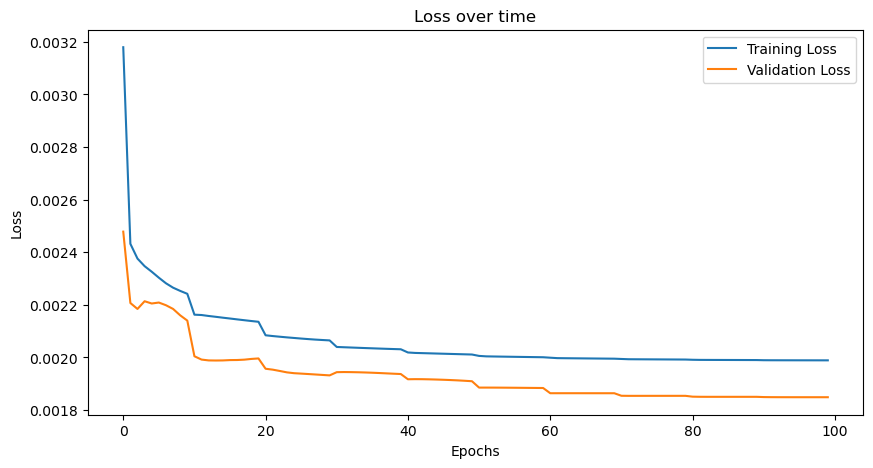

Root Mean Squared Error on Test Data: 5.95034
Mean Bias Error on Test Data: -0.73708224
Mean Absolute Error on Test Data: 3.3401845
Kling-Gupta efficiency on Test Data: 0.9400352413418891
R2 Score on Test Data: 0.974857462657895


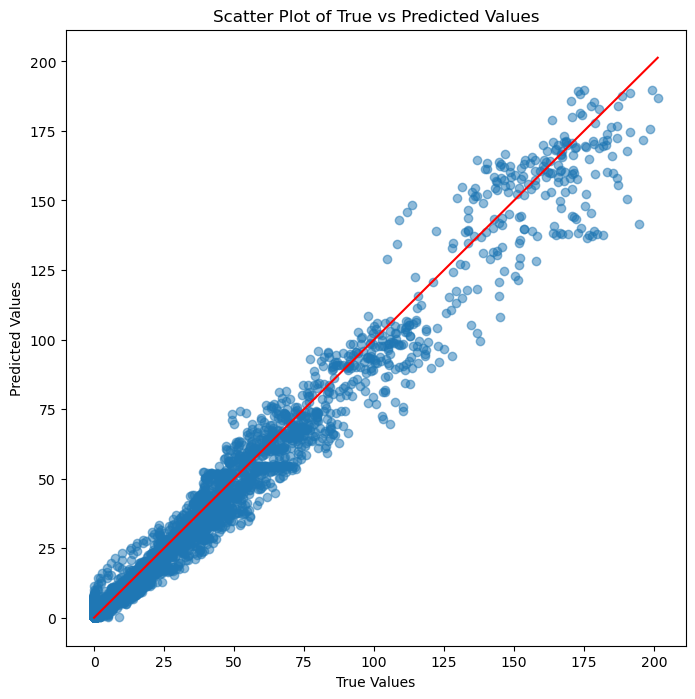

In [9]:
globalModel,_,_,_,_,_ = tool.train(df=df, df_test=df_test, var=['HS'], hidden_dims=[60,30], num_epochs=100,  step_size=10, gamma=0.5, ts=30, lr=0.001)

### Train the model with Snow Depth only

Epoch 1/100, Train Loss: 0.00402610597769976, Val Loss: 0.0028177807074604047
Epoch 2/100, Train Loss: 0.0028096706952148664, Val Loss: 0.002793694525808189
Epoch 3/100, Train Loss: 0.0027512954495159604, Val Loss: 0.0027748296099753523
Epoch 4/100, Train Loss: 0.0027232418014653337, Val Loss: 0.0027478839098777396
Epoch 5/100, Train Loss: 0.0027062211067018106, Val Loss: 0.002740248832979625
Epoch 6/100, Train Loss: 0.0026928775494031165, Val Loss: 0.0027310637085885274
Epoch 7/100, Train Loss: 0.0026794830226150768, Val Loss: 0.002718742056136054
Epoch 8/100, Train Loss: 0.0026605480985284428, Val Loss: 0.002706863367497648
Epoch 9/100, Train Loss: 0.0026446678972400248, Val Loss: 0.002698833041409639
Epoch 10/100, Train Loss: 0.0026309488332098294, Val Loss: 0.0026868918093121874
Epoch 11/100, Train Loss: 0.002505478425314345, Val Loss: 0.0026573719679394065
Epoch 12/100, Train Loss: 0.0025023032805099126, Val Loss: 0.002656251787767047
Epoch 13/100, Train Loss: 0.002499439742102584

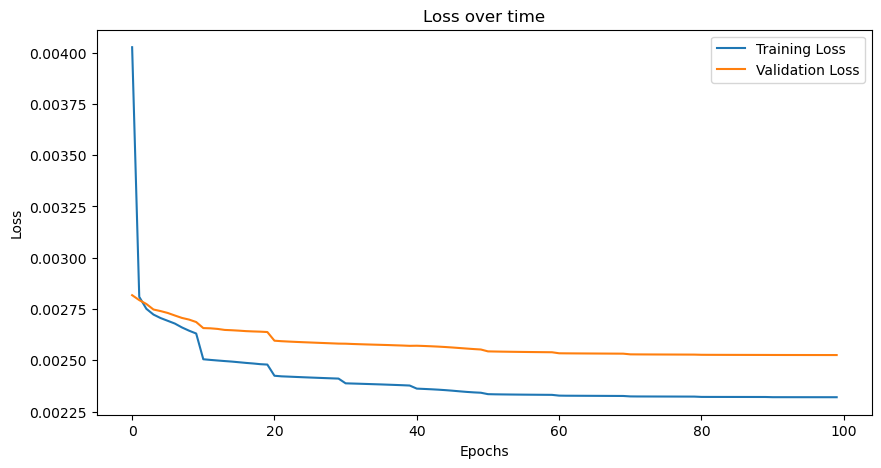

Root Mean Squared Error on Test Data: 6.998446
Kling-Gupta efficiency on Test Data: 0.9283563759001665
Mean Absolute Error on Test Data: 4.324331
R2 Score on Test Data: 0.9716238510035586


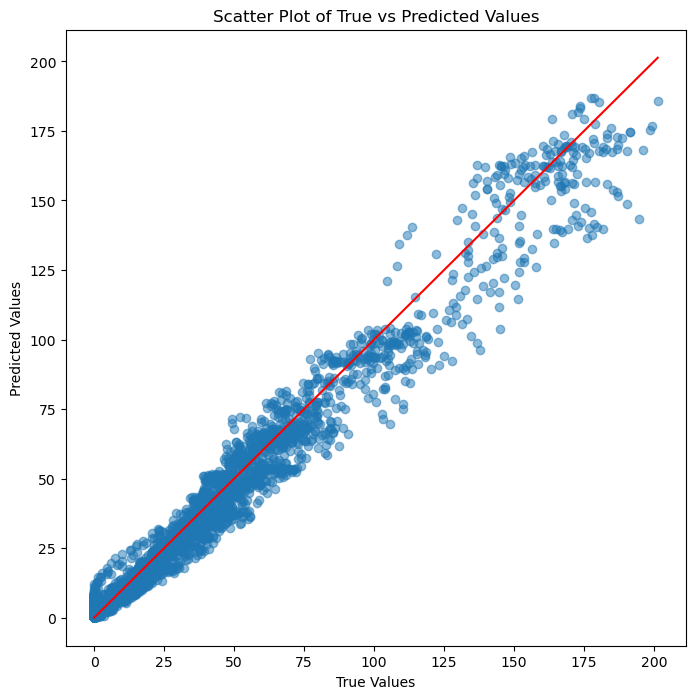

In [11]:
globalModel,_,_,_,_,_ = tool.train(df=df, df_test=df_test, var=['HS'], hidden_dims=[60,30], num_epochs=100,  step_size=10, gamma=0.5, ts=30, lr=0.001)

### Train the model with different architectures

Epoch 1/100, Train Loss: 0.0034787056135555544, Val Loss: 0.003548418589184547
Epoch 2/100, Train Loss: 0.00243425135303214, Val Loss: 0.0031720858379901155
Epoch 3/100, Train Loss: 0.0023892446454174135, Val Loss: 0.00284425406937066
Epoch 4/100, Train Loss: 0.002356888891874455, Val Loss: 0.002635471327647395
Epoch 5/100, Train Loss: 0.002329782296658072, Val Loss: 0.0024898767858691872
Epoch 6/100, Train Loss: 0.002307337901220176, Val Loss: 0.002403270255783677
Epoch 7/100, Train Loss: 0.0022865222305075913, Val Loss: 0.0023874836976284417
Epoch 8/100, Train Loss: 0.0022763360839363343, Val Loss: 0.0023884023554016373
Epoch 9/100, Train Loss: 0.00226762264266707, Val Loss: 0.0023948732208065033
Epoch 10/100, Train Loss: 0.0022615564162360284, Val Loss: 0.002401691519730291
Epoch 11/100, Train Loss: 0.002194016457433752, Val Loss: 0.0023272978498002747
Epoch 12/100, Train Loss: 0.002192260442833383, Val Loss: 0.0023248138144321717
Epoch 13/100, Train Loss: 0.0021905218987715923, Val

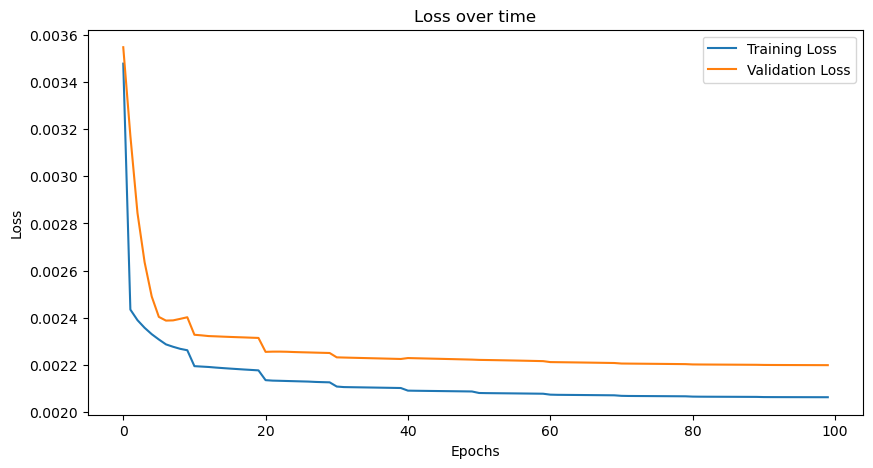

Root Mean Squared Error on Test Data: 6.480009
Mean Bias Error on Test Data: -0.81180465
Mean Absolute Error on Test Data: 3.7254963
Kling-Gupta efficiency on Test Data: 0.9421262028750143
R2 Score on Test Data: 0.9717070581605224


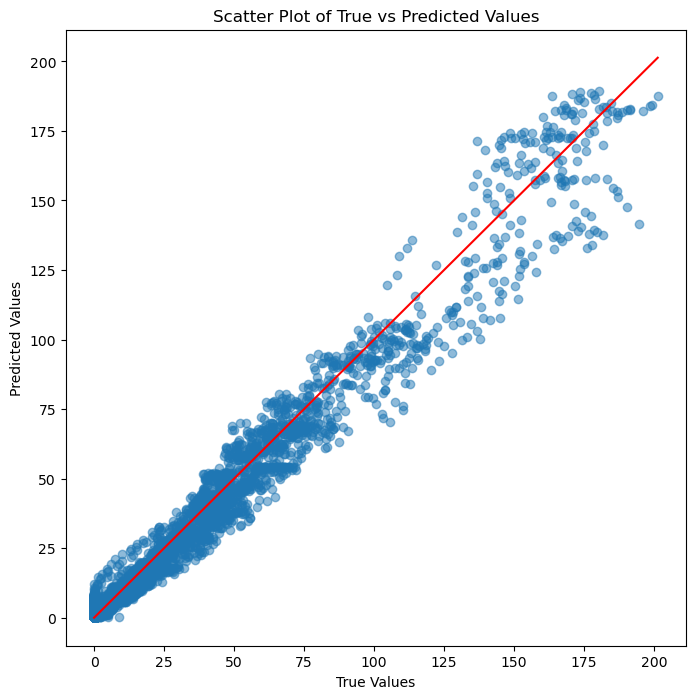

In [ ]:
globalModel,_,_,_,_,_ = tool.train(df=df, df_test=df_test, var=['HS'], hidden_dims=[50], num_epochs=100,  step_size=10, gamma=0.5, ts=30, lr=0.001)

# Grid Search for model architectures

The following section shows how to use grid search determine the model architectures.

Note: Due to random initialisation, if the loss doesn't decrease, simply re-run the cell or manually execute the provided command and record the results.

"""

model,rmse,mae,mbe,kge,r2= models.train(df=df, df_test=df_test, var=['HS'], hidden_dims=[50], num_epochs=100,  step_size=10, gamma=0.5, ts=30, lr=0.001)
 
"""

In [6]:
hyper_para = [[50], [60,30],[70,50,30]]
hyper_type = "architecture"

Epoch 1/100, Train Loss: 0.0026600803344246256, Val Loss: 0.0015522349291327807
Epoch 2/100, Train Loss: 0.0015181324670207766, Val Loss: 0.0015173957712269759
Epoch 3/100, Train Loss: 0.0014955747947499667, Val Loss: 0.0015075567291203025
Epoch 4/100, Train Loss: 0.0014771731379623675, Val Loss: 0.0014780733804494828
Epoch 5/100, Train Loss: 0.0014619664378341774, Val Loss: 0.0014778366176066277
Epoch 6/100, Train Loss: 0.0014439609810235681, Val Loss: 0.00149552605446346
Epoch 7/100, Train Loss: 0.0014275480160885932, Val Loss: 0.0014776282172935596
Epoch 8/100, Train Loss: 0.0014178758081126533, Val Loss: 0.0014606447810230829
Epoch 9/100, Train Loss: 0.0014119145439009152, Val Loss: 0.0014513161443037834
Epoch 10/100, Train Loss: 0.0014074547040517297, Val Loss: 0.00144608859997434
Epoch 11/100, Train Loss: 0.0014036905875294946, Val Loss: 0.001442831022726766
Epoch 12/100, Train Loss: 0.0014002815239874213, Val Loss: 0.0014400891995407586
Epoch 13/100, Train Loss: 0.00139718221695

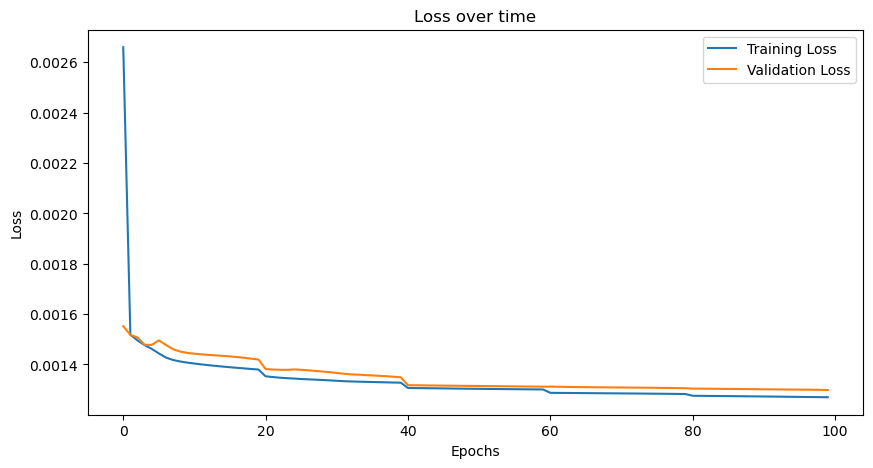

Root Mean Squared Error on Test Data: 7.2421923
Mean Bias Error on Test Data: -0.60099465
Mean Absolute Error on Test Data: 4.621488
Kling-Gupta efficiency on Test Data: 0.939231074371851
R2 Score on Test Data: 0.9691087775900887


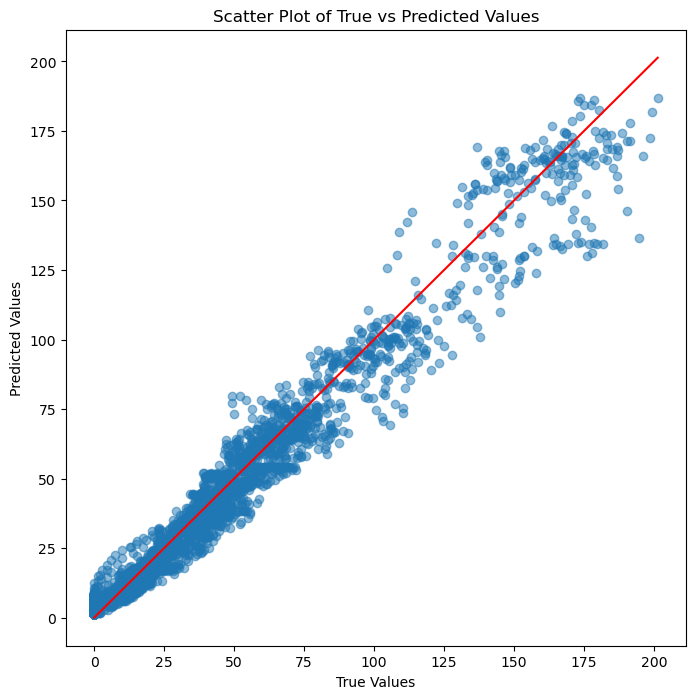

Epoch 1/100, Train Loss: 0.0027395068054581113, Val Loss: 0.0013732743802147905
Epoch 2/100, Train Loss: 0.001563436859072091, Val Loss: 0.0013508497749434916
Epoch 3/100, Train Loss: 0.0015267783417879605, Val Loss: 0.0013383291689835943
Epoch 4/100, Train Loss: 0.001505809989958223, Val Loss: 0.001330872464283388
Epoch 5/100, Train Loss: 0.0014943844653184243, Val Loss: 0.0013268216867114372
Epoch 6/100, Train Loss: 0.0014865584939210176, Val Loss: 0.001322985967680157
Epoch 7/100, Train Loss: 0.0014789111612518173, Val Loss: 0.001318895829430542
Epoch 8/100, Train Loss: 0.001470714009726142, Val Loss: 0.0013143621449878708
Epoch 9/100, Train Loss: 0.0014623615278633192, Val Loss: 0.0013095625815213317
Epoch 10/100, Train Loss: 0.0014542918703320542, Val Loss: 0.0013046841501200637
Epoch 11/100, Train Loss: 0.0014466221526159967, Val Loss: 0.0012994623864502162
Epoch 12/100, Train Loss: 0.0014393977889100274, Val Loss: 0.0012943550553838664
Epoch 13/100, Train Loss: 0.001432698020409

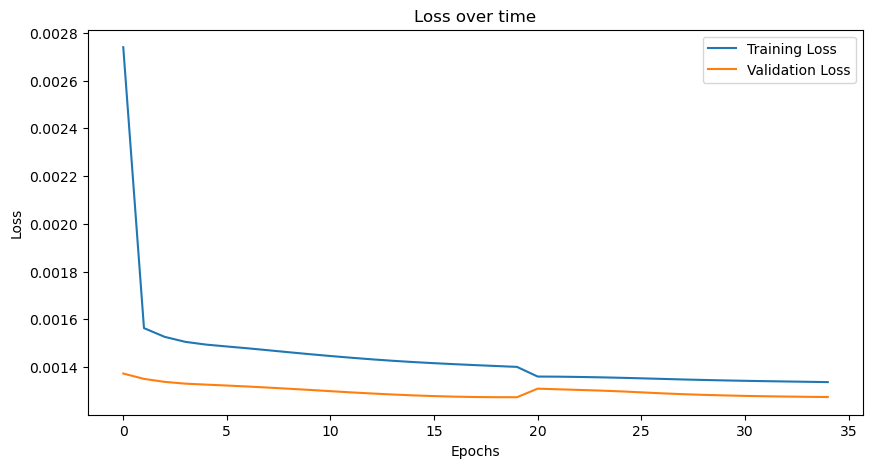

Root Mean Squared Error on Test Data: 8.098211
Mean Bias Error on Test Data: -1.9566894
Mean Absolute Error on Test Data: 4.9385366
Kling-Gupta efficiency on Test Data: 0.8743441639610698
R2 Score on Test Data: 0.9614850264757431


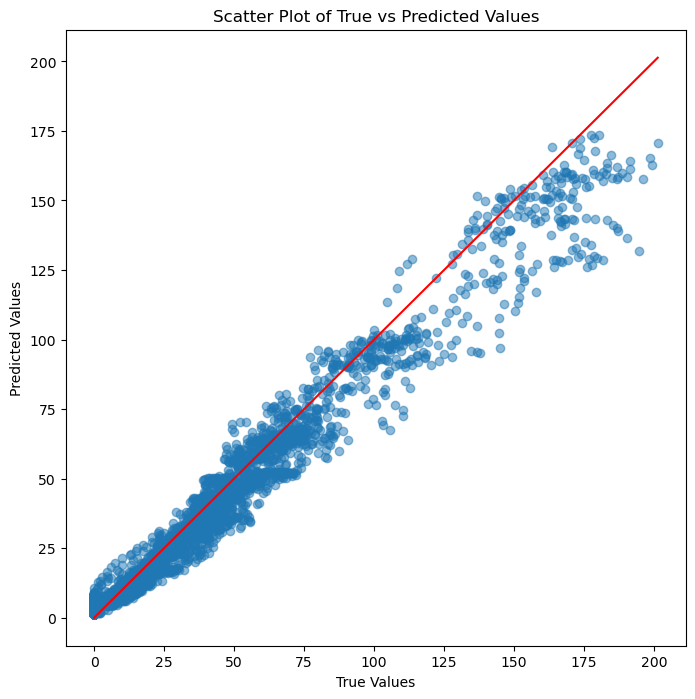

Epoch 1/100, Train Loss: 0.0022765485224369754, Val Loss: 0.0013992090258968496
Epoch 2/100, Train Loss: 0.0015181912453394075, Val Loss: 0.0013715192911339501
Epoch 3/100, Train Loss: 0.0015006053770634947, Val Loss: 0.0013745367397433664
Epoch 4/100, Train Loss: 0.0014871449269582531, Val Loss: 0.0013788881563463094
Epoch 5/100, Train Loss: 0.001476172703249311, Val Loss: 0.001384103420163346
Epoch 6/100, Train Loss: 0.0014688857547551437, Val Loss: 0.0013784538211008923
Epoch 7/100, Train Loss: 0.0014624348454219834, Val Loss: 0.001369508021477603
Epoch 8/100, Train Loss: 0.0014549383829398203, Val Loss: 0.001364628544205472
Epoch 9/100, Train Loss: 0.001446895963363774, Val Loss: 0.001361531590165888
Epoch 10/100, Train Loss: 0.0014394028564554207, Val Loss: 0.001356736439770069
Epoch 11/100, Train Loss: 0.00143288851833698, Val Loss: 0.001344793954958168
Epoch 12/100, Train Loss: 0.0014267149854828192, Val Loss: 0.0013340804036891338
Epoch 13/100, Train Loss: 0.0014212467608989304

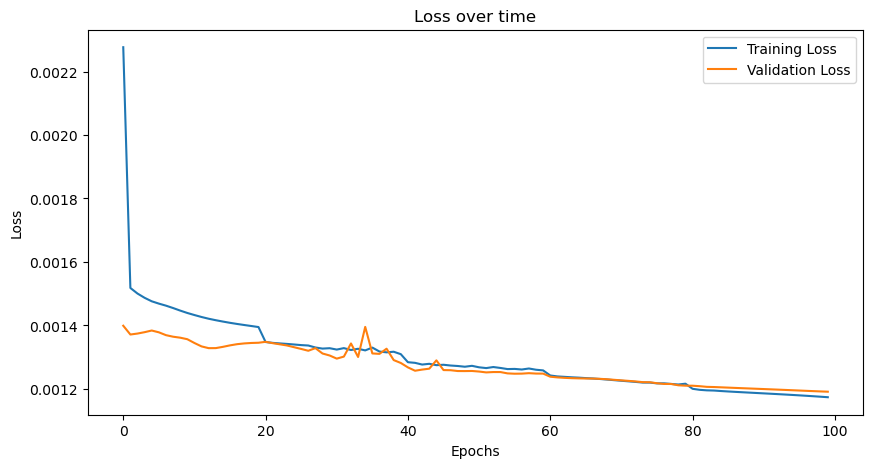

Root Mean Squared Error on Test Data: 7.634305
Mean Bias Error on Test Data: -0.43895966
Mean Absolute Error on Test Data: 4.8044677
Kling-Gupta efficiency on Test Data: 0.9386061657837392
R2 Score on Test Data: 0.9656994659057948


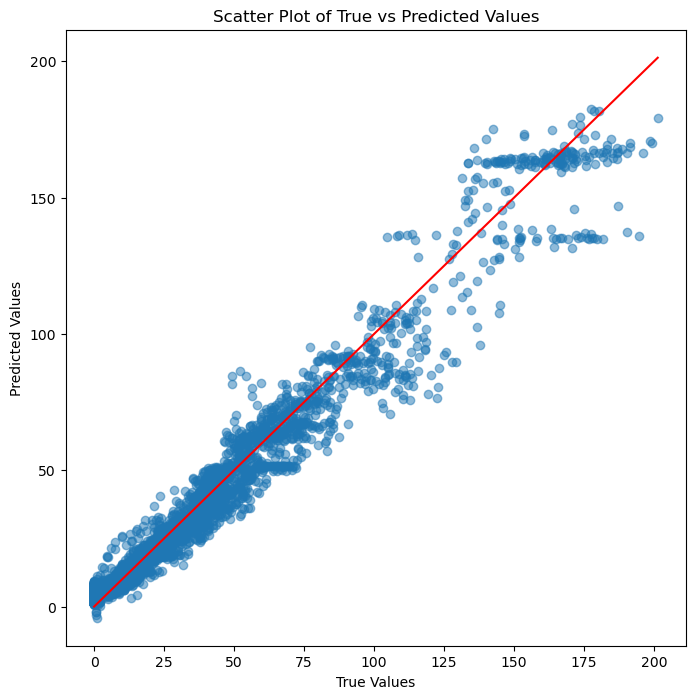

Epoch 1/100, Train Loss: 0.005686741861089676, Val Loss: 0.0014116569039028207
Epoch 2/100, Train Loss: 0.0015992243899728166, Val Loss: 0.0014047553441208515
Epoch 3/100, Train Loss: 0.0015570855270629891, Val Loss: 0.0014120520654429733
Epoch 4/100, Train Loss: 0.0015395785950713568, Val Loss: 0.0014003796187420261
Epoch 5/100, Train Loss: 0.0015212198531602981, Val Loss: 0.0013837781619865286
Epoch 6/100, Train Loss: 0.0015067015768746239, Val Loss: 0.001375653371275774
Epoch 7/100, Train Loss: 0.0014952127741374225, Val Loss: 0.0013731137446558119
Epoch 8/100, Train Loss: 0.001485287372816622, Val Loss: 0.0013722994105862412
Epoch 9/100, Train Loss: 0.0014761463152456013, Val Loss: 0.0013715779920413578
Epoch 10/100, Train Loss: 0.0014676678720031765, Val Loss: 0.0013707224853373888
Epoch 11/100, Train Loss: 0.0014602465530884582, Val Loss: 0.0013699840933149065
Epoch 12/100, Train Loss: 0.0014536972189247114, Val Loss: 0.001368348456427467
Epoch 13/100, Train Loss: 0.0014474867377

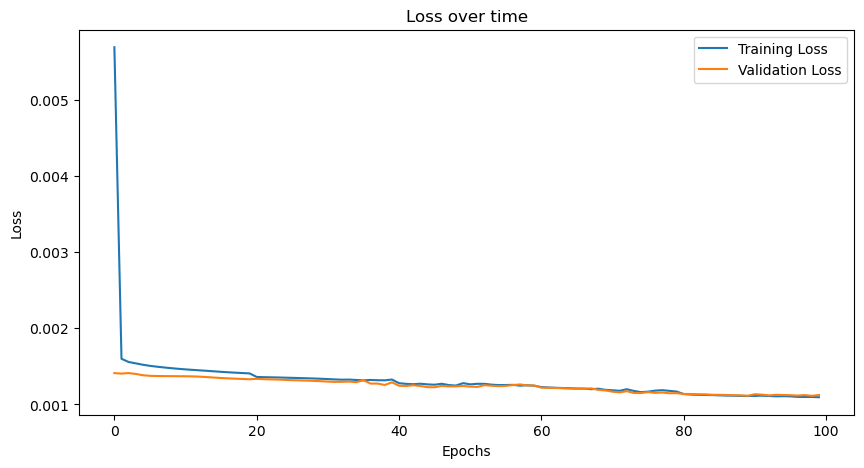

Root Mean Squared Error on Test Data: 8.007597
Mean Bias Error on Test Data: -0.990359
Mean Absolute Error on Test Data: 4.9280715
Kling-Gupta efficiency on Test Data: 0.9426909917198436
R2 Score on Test Data: 0.9622159784023435


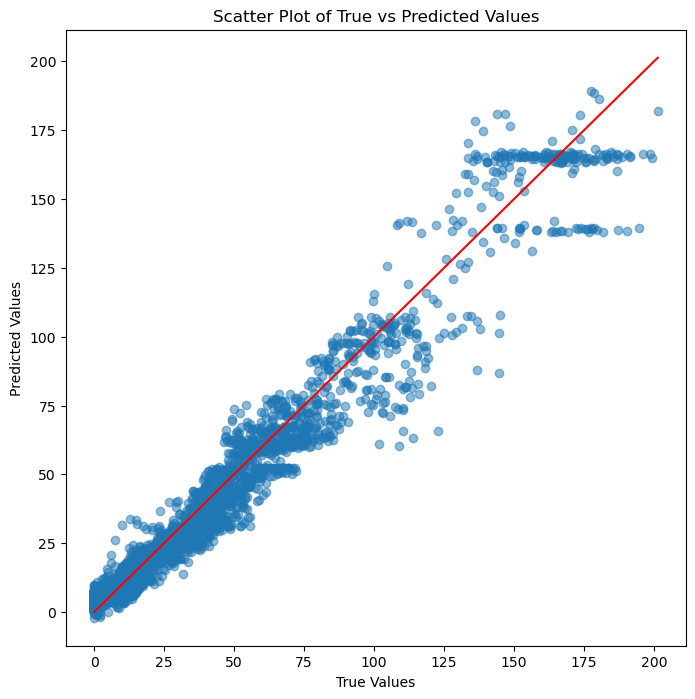

In [ ]:
results = tool.grid_search(hyper_para, df=df, df_test=df_test, var=['HS'], ts=30, hidden_dims=[50],
                           num_epochs=60, step_size=20, gamma=0.5, lr=0.001, is_early_stop=True, threshold=10, hyper_type=hyper_type)

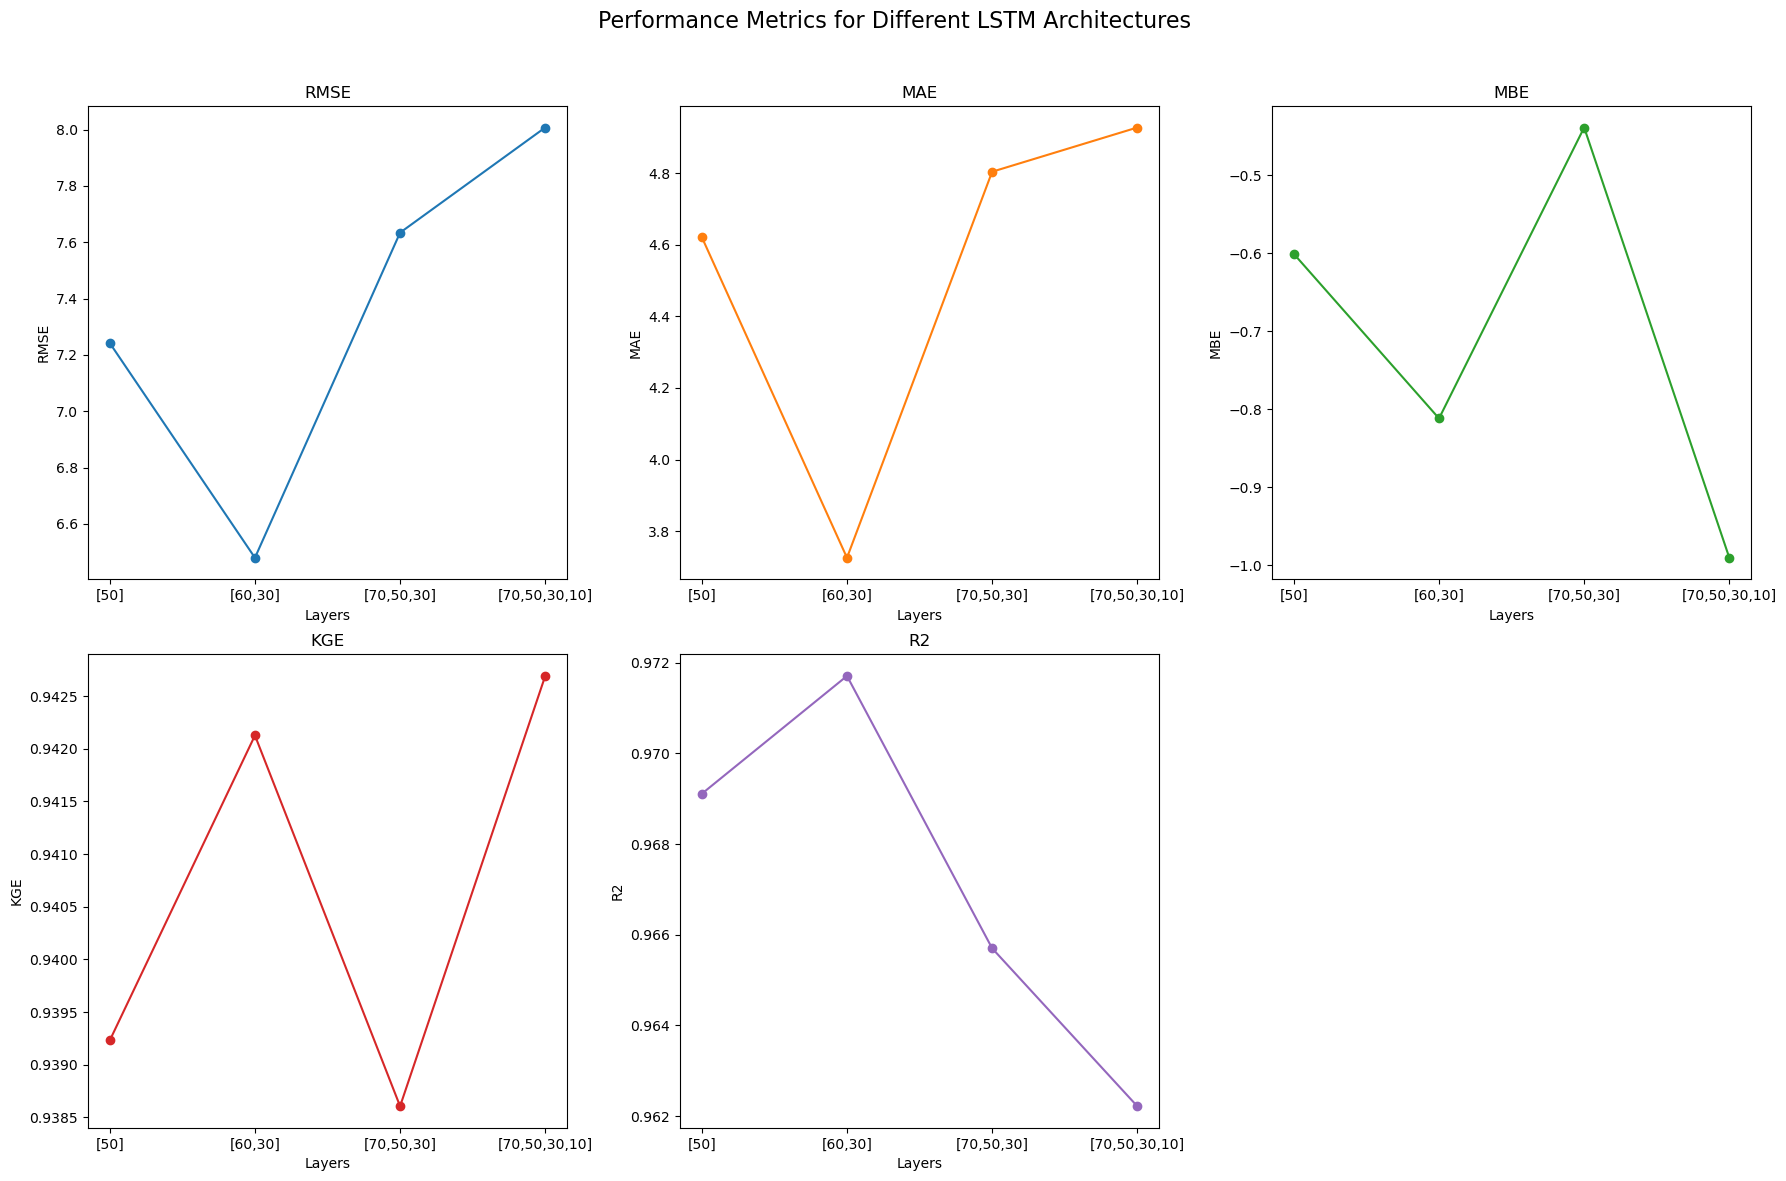

In [33]:
# Plot the grid search results
tool.plot_grid_search(hyper_para, hyper_type, results)

From the result above, we can see that the model architecutre with [60,30], means 2 layers with 60 and 30 neurons respectively, has the best performance.|

# Captum

After we determine the model architecutre, we can use the model of architecture [60,30], with all meteorological variables and 90-day time sequence to calculate the feature importance and time sequence importance by using **Captum**.

Epoch 1/100, Train Loss: 0.0038483174069281587, Val Loss: 0.002544653936874839
Epoch 2/100, Train Loss: 0.002568037386672701, Val Loss: 0.0025036220479637944
Epoch 3/100, Train Loss: 0.0025297392849227855, Val Loss: 0.0024691252211732303
Epoch 4/100, Train Loss: 0.002508134284338674, Val Loss: 0.002478741671386348
Epoch 5/100, Train Loss: 0.002490386876738375, Val Loss: 0.002505045527177027
Epoch 6/100, Train Loss: 0.002462969963484982, Val Loss: 0.0023847683234640414
Epoch 7/100, Train Loss: 0.002431363959277033, Val Loss: 0.0023884621650755306
Epoch 8/100, Train Loss: 0.0023926887699286946, Val Loss: 0.0023136137294402495
Epoch 9/100, Train Loss: 0.0023508054013943636, Val Loss: 0.002411988326928845
Epoch 10/100, Train Loss: 0.0023040488616019126, Val Loss: 0.002478637056418535
Epoch 11/100, Train Loss: 0.00215399903719282, Val Loss: 0.0021599866013244763
Epoch 12/100, Train Loss: 0.002089263106434005, Val Loss: 0.0023795714607472893
Epoch 13/100, Train Loss: 0.0020419798271714825, V

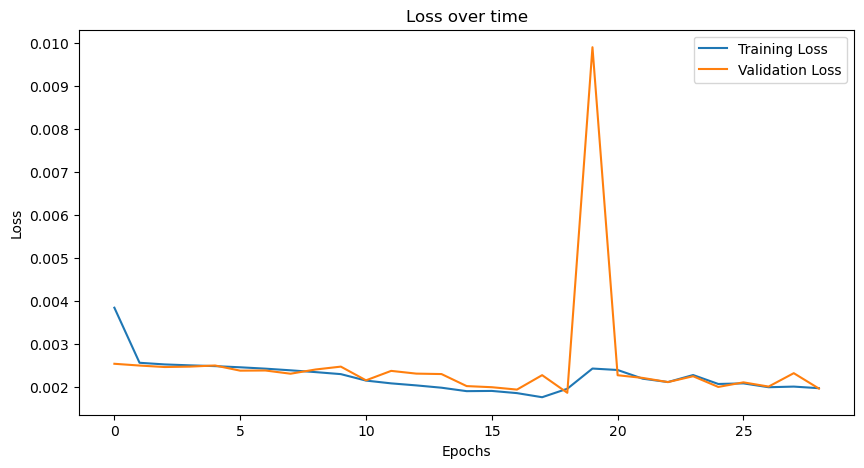

Root Mean Squared Error on Test Data: 7.172189
Mean Bias Error on Test Data: -1.1113408
Mean Absolute Error on Test Data: 4.182347
Kling-Gupta efficiency on Test Data: 0.9576550362666363
R2 Score on Test Data: 0.9709630496935016


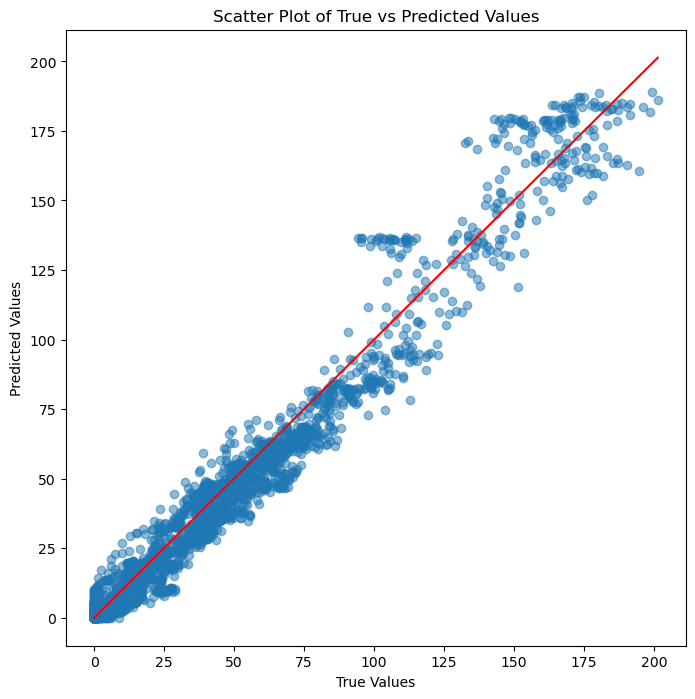

In [15]:
# Train the model with the architecture that will have the best performance
model_archi,_,_,_,_,_ = tool.train(df=df, df_test=df_test, var=var, hidden_dims=hyper_para[1], 
                                   num_epochs=100,  step_size=10, gamma=0.5, ts=90, lr=0.001, is_early_stop=True, threshold=10)

In [16]:
# Use the first 1000 observations to generate the attribute
X = df[:1000]
X, _ = tool.rebuild_data(X, var, 90)
X_torch = torch.from_numpy(X).float()

In [34]:
# Calculate attributes for each feature in global model
attr = tool.cal_integrated_gradients(model_archi, X_torch)
mean_attributions, sum_attributions = tool.cal_attr(attr)

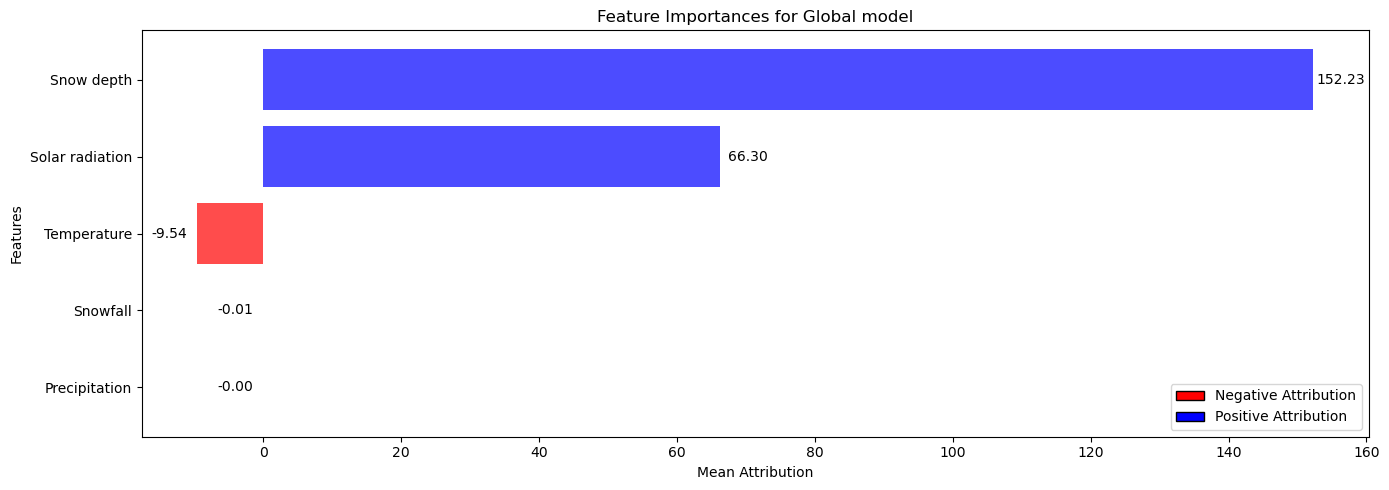

In [32]:
# Plot the Feature Attribution over Time for Global model
tool.plot_attribution(sum_attributions, feature_names=['Snow depth','Temperature','Precipitation','Snowfall','Solar radiation'],
                      title = "Feature Importances for Global model", show_percentage=True, shift=4)

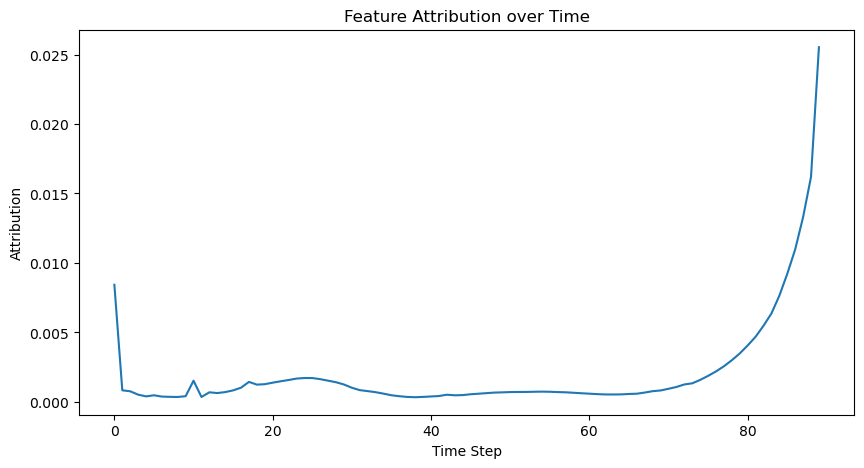

In [33]:
# Plot the Feature Attribution over Time for Global model
# Index 0 represent snow depth
tool.plot_attr_over_time(attr, 0)

# Feature Selection

After analysing the features' significance within the hidden layers, the features are removed based on their importance ranking iteratively.

Epoch 1/100, Train Loss: 0.003788166037536686, Val Loss: 0.002575598291457925
Epoch 2/100, Train Loss: 0.002564139850548162, Val Loss: 0.002523835327168245
Epoch 3/100, Train Loss: 0.0025284577213141295, Val Loss: 0.002475555630020076
Epoch 4/100, Train Loss: 0.0025132797664951904, Val Loss: 0.0024608071122229716
Epoch 5/100, Train Loss: 0.002483225513356718, Val Loss: 0.002355421433137662
Epoch 6/100, Train Loss: 0.0024615652396251303, Val Loss: 0.002448721522941912
Epoch 7/100, Train Loss: 0.002436089531858923, Val Loss: 0.0024105581078553433
Epoch 8/100, Train Loss: 0.0024042717076396916, Val Loss: 0.002318788149021448
Epoch 9/100, Train Loss: 0.002379486235231947, Val Loss: 0.002309338562652167
Epoch 10/100, Train Loss: 0.002347233908851179, Val Loss: 0.002315678530814866
Epoch 11/100, Train Loss: 0.002208647028742484, Val Loss: 0.002192196124279469
Epoch 12/100, Train Loss: 0.002176443544238067, Val Loss: 0.0021604781707544865
Epoch 13/100, Train Loss: 0.002128196573906621, Val Lo

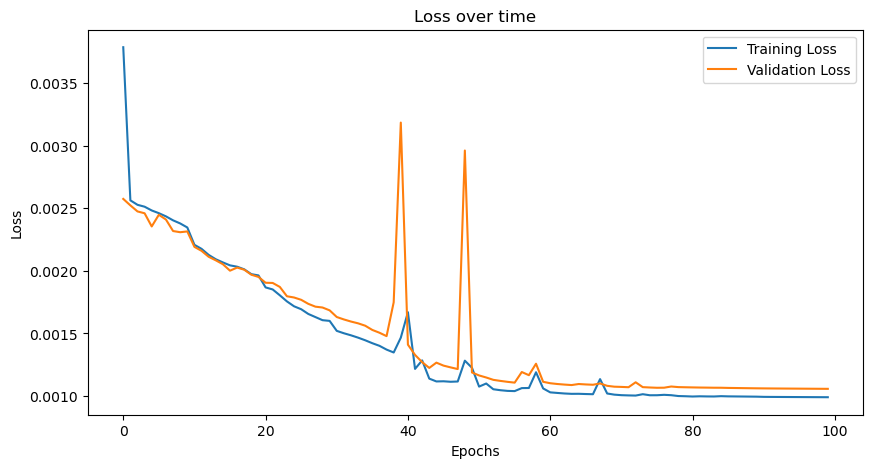

Root Mean Squared Error on Test Data: 9.006554
Mean Bias Error on Test Data: -3.310032
Mean Absolute Error on Test Data: 4.926858
Kling-Gupta efficiency on Test Data: 0.8302906185174346
R2 Score on Test Data: 0.9542106128820564


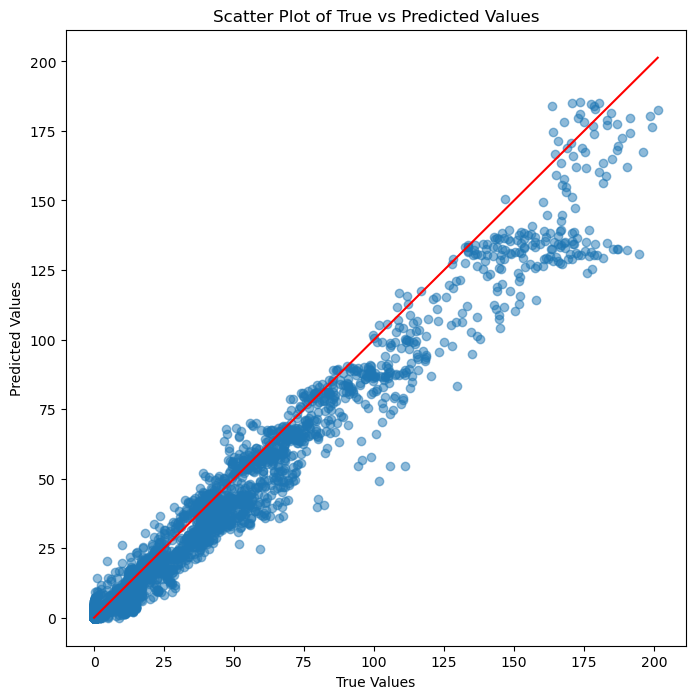

In [38]:
# Train the model with the architecture that will have the best performance
result_3 = tool.train(df=df, df_test=df_test, var=['HS','solar_radiation','temperature'], hidden_dims=hyper_para[1], 
                                   num_epochs=100,  step_size=10, gamma=0.5, ts=90, lr=0.001, is_early_stop=True, threshold=10)

Epoch 1/100, Train Loss: 0.0037890694143185746, Val Loss: 0.0025251422687756803
Epoch 2/100, Train Loss: 0.002643941448046531, Val Loss: 0.00243042978369512
Epoch 3/100, Train Loss: 0.002588317152810232, Val Loss: 0.0024151996562272733
Epoch 4/100, Train Loss: 0.0025591398793408248, Val Loss: 0.0024465376720817764
Epoch 5/100, Train Loss: 0.002543805533664435, Val Loss: 0.0024386205116435776
Epoch 6/100, Train Loss: 0.002522965401135, Val Loss: 0.002400945906052545
Epoch 7/100, Train Loss: 0.0025056764620252124, Val Loss: 0.0024172619923766947
Epoch 8/100, Train Loss: 0.0024839702672875223, Val Loss: 0.0024064954158497798
Epoch 9/100, Train Loss: 0.002436551246261578, Val Loss: 0.002346853942678488
Epoch 10/100, Train Loss: 0.0024303817176476185, Val Loss: 0.002818692187674342
Epoch 11/100, Train Loss: 0.002363711540643244, Val Loss: 0.0023231054138587864
Epoch 12/100, Train Loss: 0.0022920236746212744, Val Loss: 0.0022220268042707427
Epoch 13/100, Train Loss: 0.002255992342758224, Val

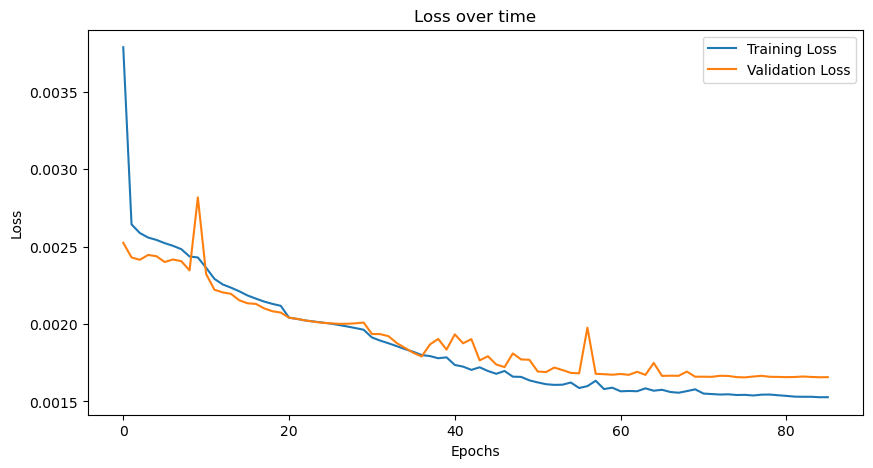

Root Mean Squared Error on Test Data: 7.032589
Mean Bias Error on Test Data: -0.26108107
Mean Absolute Error on Test Data: 4.1902437
Kling-Gupta efficiency on Test Data: 0.9519556013139732
R2 Score on Test Data: 0.972082403297686


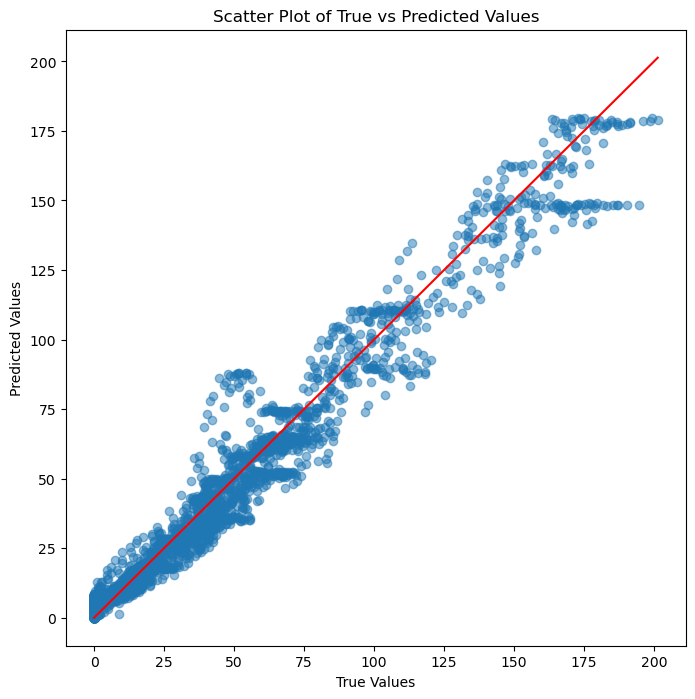

In [9]:
# Train the model with the architecture that will have the best performance
result_2 = tool.train(df=df, df_test=df_test, var=['HS','solar_radiation'], hidden_dims=hyper_para[1], 
                                   num_epochs=100,  step_size=10, gamma=0.5, ts=90, lr=0.001, is_early_stop=True, threshold=10)

Epoch 1/100, Train Loss: 0.003671352118538606, Val Loss: 0.002696076258832337
Epoch 2/100, Train Loss: 0.0026192022472785056, Val Loss: 0.002452131995369056
Epoch 3/100, Train Loss: 0.0025630448410436826, Val Loss: 0.002466175168225425
Epoch 4/100, Train Loss: 0.002552701530360149, Val Loss: 0.0024405485233207516
Epoch 5/100, Train Loss: 0.0025553740456627626, Val Loss: 0.0024941664661931617
Epoch 6/100, Train Loss: 0.0025387885520786815, Val Loss: 0.002499446615048713
Epoch 7/100, Train Loss: 0.0025253975785775543, Val Loss: 0.002479204897896678
Epoch 8/100, Train Loss: 0.002509873943749171, Val Loss: 0.0024604742660603047
Epoch 9/100, Train Loss: 0.0024930367967603093, Val Loss: 0.002442961586299444
Epoch 10/100, Train Loss: 0.0024775102702883083, Val Loss: 0.0024280077257236646
Epoch 11/100, Train Loss: 0.002371897770141994, Val Loss: 0.002374273791348971
Epoch 12/100, Train Loss: 0.002370736134245418, Val Loss: 0.0023691902653937085
Epoch 13/100, Train Loss: 0.002366705380334963, V

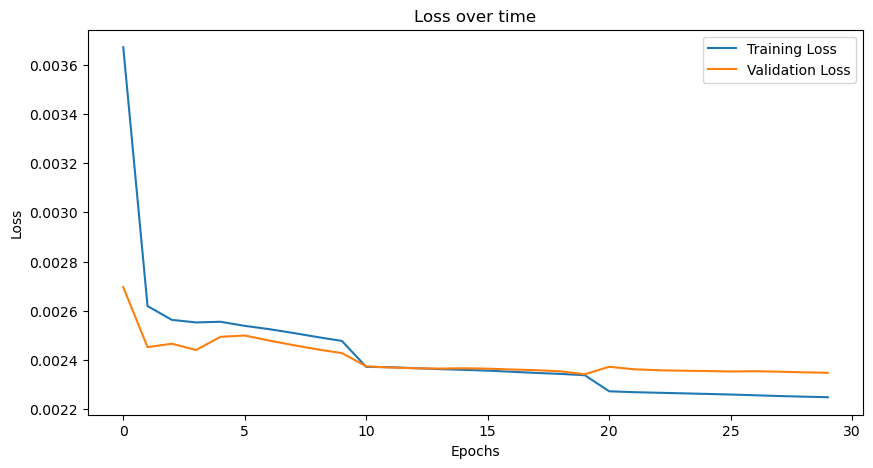

Root Mean Squared Error on Test Data: 7.0165796
Mean Bias Error on Test Data: -1.2583458
Mean Absolute Error on Test Data: 4.1831694
Kling-Gupta efficiency on Test Data: 0.914683313104485
R2 Score on Test Data: 0.9722093638482594


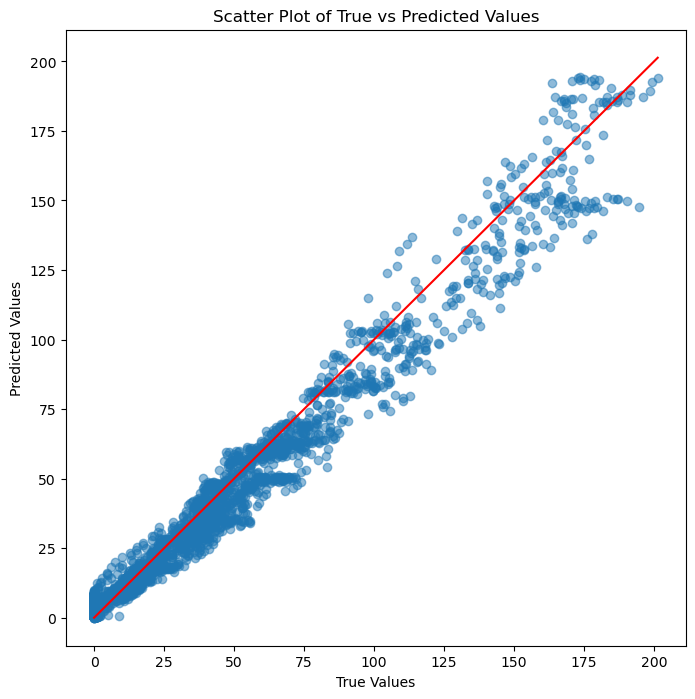

In [11]:
# Train the model with the architecture that will have the best performance
result_1 = tool.train(df=df, df_test=df_test, var=['HS'], hidden_dims=hyper_para[1], 
                                   num_epochs=100,  step_size=10, gamma=0.5, ts=90, lr=0.001, is_early_stop=True, threshold=10)

# Time Sequence Selection

In [6]:
timeseries = [14, 30 ,60]

Epoch 1/60, Train Loss: 0.0031112524413452894, Val Loss: 0.0023779619836643276
Epoch 2/60, Train Loss: 0.0023772888310627793, Val Loss: 0.0023851199774842413
Epoch 3/60, Train Loss: 0.002350046226688849, Val Loss: 0.0023817353607402786
Epoch 4/60, Train Loss: 0.0023286047622735327, Val Loss: 0.0023787850347772913
Epoch 5/60, Train Loss: 0.0023127909954161496, Val Loss: 0.0023652070840483263
Epoch 6/60, Train Loss: 0.002295096478073554, Val Loss: 0.002364809231868743
Epoch 7/60, Train Loss: 0.002280850881128829, Val Loss: 0.002355271986336686
Epoch 8/60, Train Loss: 0.0022727828902021773, Val Loss: 0.002342956965473815
Epoch 9/60, Train Loss: 0.0022596004181498915, Val Loss: 0.0023288133770876995
Epoch 10/60, Train Loss: 0.0022518831933797164, Val Loss: 0.0023134428141563753
Epoch 11/60, Train Loss: 0.002243398445953848, Val Loss: 0.002299138496019241
Epoch 12/60, Train Loss: 0.002234110060689524, Val Loss: 0.002284283397778582
Epoch 13/60, Train Loss: 0.002225558479010791, Val Loss: 0.

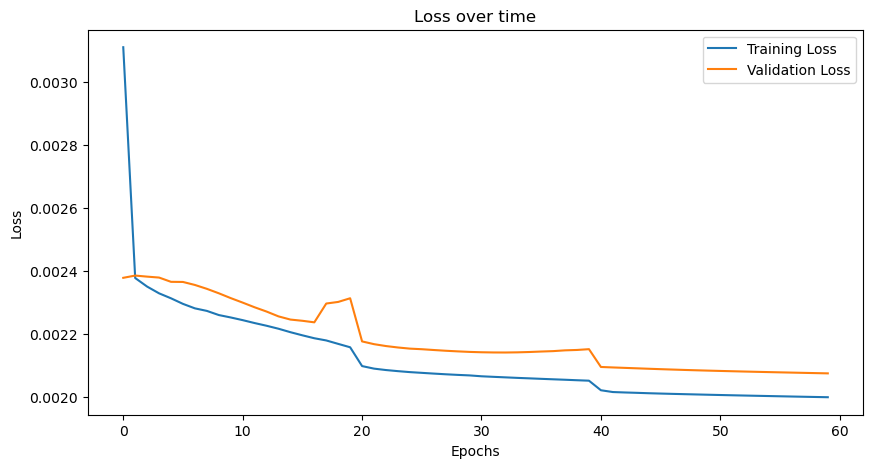

Root Mean Squared Error on Test Data: 7.69041
Mean Bias Error on Test Data: -0.40100515
Mean Absolute Error on Test Data: 3.448232
Kling-Gupta efficiency on Test Data: 0.9704350407072511
R2 Score on Test Data: 0.9546384523090967


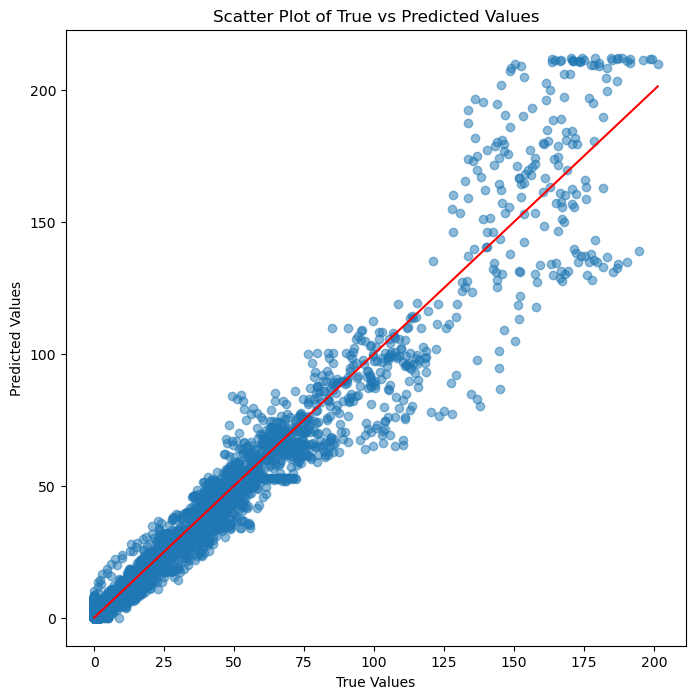

Epoch 1/60, Train Loss: 0.003510818920389311, Val Loss: 0.002607269560633735
Epoch 2/60, Train Loss: 0.0024578275043716565, Val Loss: 0.0022701209546757517
Epoch 3/60, Train Loss: 0.0024015960487014086, Val Loss: 0.002162680300017266
Epoch 4/60, Train Loss: 0.0023710495550986967, Val Loss: 0.0021434875469604387
Epoch 5/60, Train Loss: 0.0023466866509086483, Val Loss: 0.002169128697885106
Epoch 6/60, Train Loss: 0.0023283925000059623, Val Loss: 0.002169395429295206
Epoch 7/60, Train Loss: 0.0023109010643470817, Val Loss: 0.00215756386380038
Epoch 8/60, Train Loss: 0.0022943278050592073, Val Loss: 0.002152262650039657
Epoch 9/60, Train Loss: 0.002279219334591591, Val Loss: 0.0021501362229046053
Epoch 10/60, Train Loss: 0.0022638812578164307, Val Loss: 0.002143607566199531
Epoch 11/60, Train Loss: 0.0022506122448611816, Val Loss: 0.002133843084456558
Epoch 12/60, Train Loss: 0.0022396719980948107, Val Loss: 0.002130001109688009
Epoch 13/60, Train Loss: 0.002228478154852408, Val Loss: 0.00

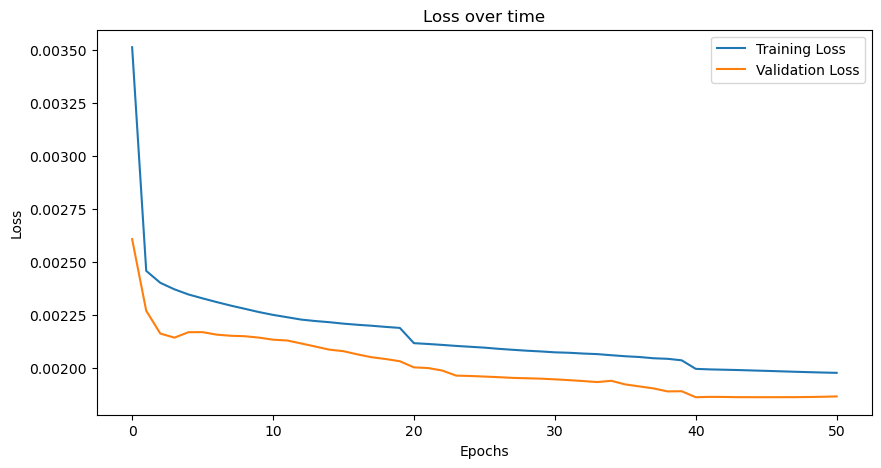

Root Mean Squared Error on Test Data: 6.399578
Mean Bias Error on Test Data: -0.90838724
Mean Absolute Error on Test Data: 3.46897
Kling-Gupta efficiency on Test Data: 0.9465959548744138
R2 Score on Test Data: 0.9709177339592697


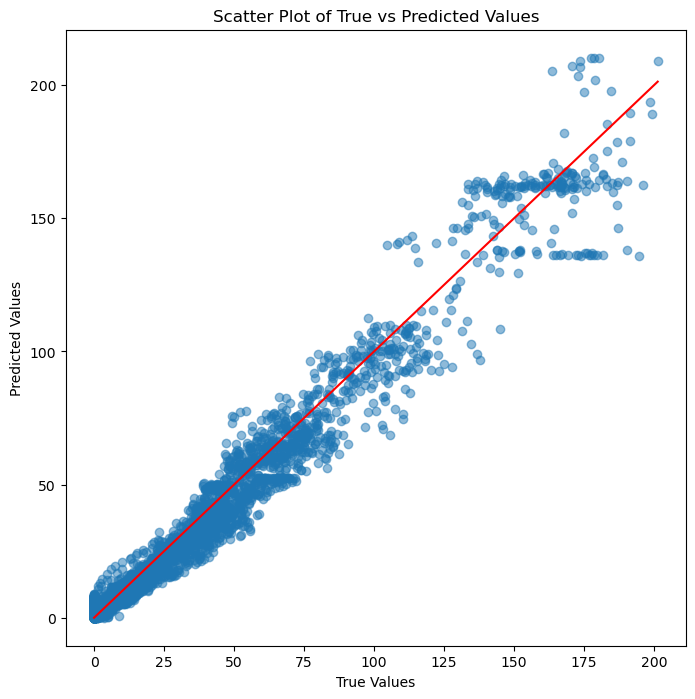

Epoch 1/60, Train Loss: 0.003614161306041899, Val Loss: 0.002682717389617865
Epoch 2/60, Train Loss: 0.002592621782484154, Val Loss: 0.00245007750241633
Epoch 3/60, Train Loss: 0.0025405486761601354, Val Loss: 0.0024736983944026536
Epoch 4/60, Train Loss: 0.0025076852605340626, Val Loss: 0.0025264748816482717
Epoch 5/60, Train Loss: 0.002480602803998338, Val Loss: 0.0025188760323455565
Epoch 6/60, Train Loss: 0.0024522250145493263, Val Loss: 0.00255749189822973
Epoch 7/60, Train Loss: 0.0024306018707069906, Val Loss: 0.0025128212719423074
Epoch 8/60, Train Loss: 0.0024119562462428874, Val Loss: 0.0024697661623130454
Epoch 9/60, Train Loss: 0.0023955033048617385, Val Loss: 0.002444438683751045
Epoch 10/60, Train Loss: 0.002382782292001801, Val Loss: 0.0024180996057348615
Epoch 11/60, Train Loss: 0.0023732624135147998, Val Loss: 0.002394094113525775
Epoch 12/60, Train Loss: 0.0023649863079785866, Val Loss: 0.0023762904815017604
Epoch 13/60, Train Loss: 0.002358162281615118, Val Loss: 0.0

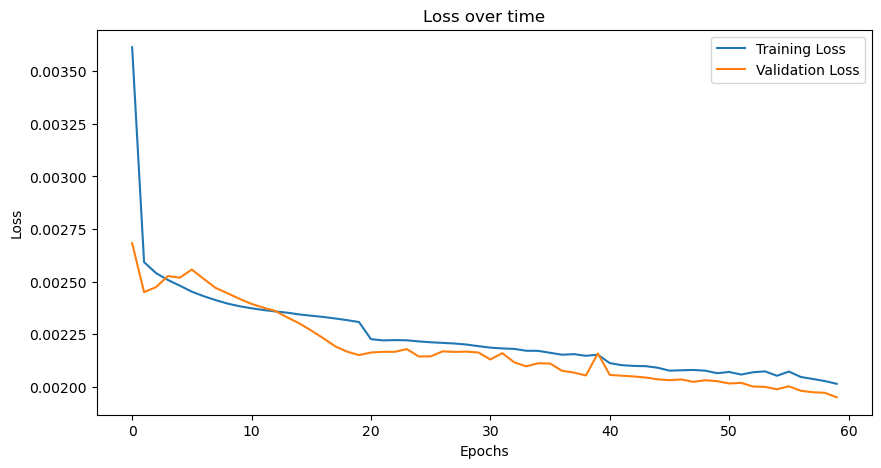

Root Mean Squared Error on Test Data: 6.596062
Mean Bias Error on Test Data: -0.16348737
Mean Absolute Error on Test Data: 4.0420947
Kling-Gupta efficiency on Test Data: 0.9558296412091436
R2 Score on Test Data: 0.9727021131977026


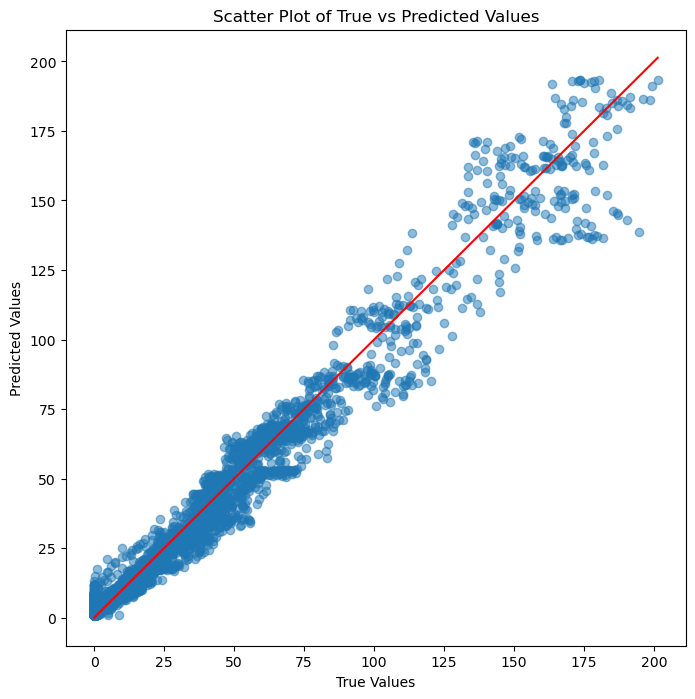

In [8]:
# Train the model with the feature and architecture that will have the best performance
results = tool.grid_search(hyper_para=timeseries, df=df, df_test=df_test, var=['HS'], ts=30, hidden_dims=[60,30],
                           num_epochs=60, step_size=20, gamma=0.5, lr=0.001, is_early_stop=True, threshold=10, hyper_type="ts")

From the results, we can see that the results with 30-day time sequence yield the best performance.

Epoch 1/60, Train Loss: 0.0036764763451976328, Val Loss: 0.002565773669357739
Epoch 2/60, Train Loss: 0.0024644259048349354, Val Loss: 0.0022805861961716634
Epoch 3/60, Train Loss: 0.0024021768066302927, Val Loss: 0.002203768066839872
Epoch 4/60, Train Loss: 0.0023693699451237614, Val Loss: 0.0021715424283312657
Epoch 5/60, Train Loss: 0.00234101777688065, Val Loss: 0.0021760571859595506
Epoch 6/60, Train Loss: 0.002317444463819008, Val Loss: 0.0021885926504705984
Epoch 7/60, Train Loss: 0.002294369289653362, Val Loss: 0.0021787315026303056
Epoch 8/60, Train Loss: 0.0022735842041744594, Val Loss: 0.0021705463450248583
Epoch 9/60, Train Loss: 0.002258327828856962, Val Loss: 0.002155903761831017
Epoch 10/60, Train Loss: 0.0022469419132468073, Val Loss: 0.002137022549428776
Epoch 11/60, Train Loss: 0.0021618112406671572, Val Loss: 0.002017090626957399
Epoch 12/60, Train Loss: 0.0021626373056620276, Val Loss: 0.0020045485164870663
Epoch 13/60, Train Loss: 0.002159584655244632, Val Loss: 0.

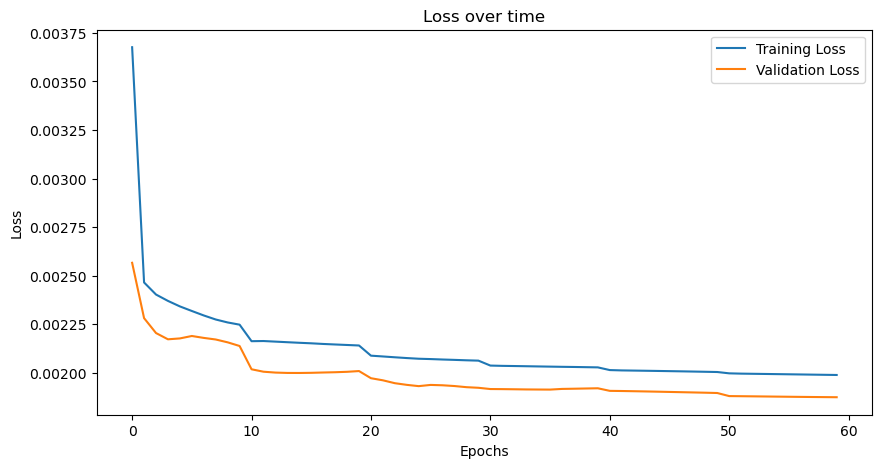

Root Mean Squared Error on Test Data: 5.9648046
Mean Bias Error on Test Data: -0.77471447
Mean Absolute Error on Test Data: 3.2697787
Kling-Gupta efficiency on Test Data: 0.95688466758147
R2 Score on Test Data: 0.9747350792179827


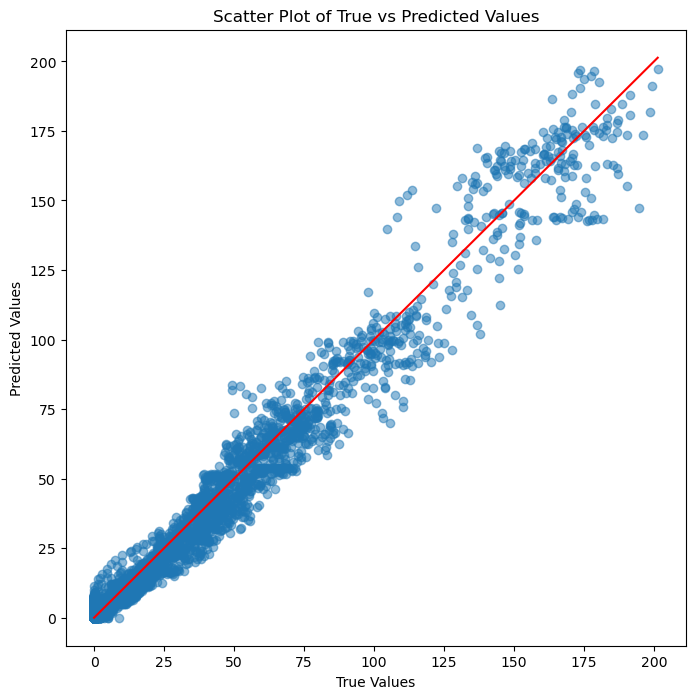

In [7]:
# Train the model with the architecture that will have the best performance
model,_,_,_,_,_ = tool.train(df=df, df_test=df_test, var=['HS'], hidden_dims=[60,30], 
                             num_epochs=60,  step_size=10, gamma=0.5, ts=30, lr=0.001, is_early_stop=True, threshold=10)

# T-test

When comparing two models, if the difference of results is small, t-test can be employed to determine if the observed differences are statistically significant. The following code is how to do the t-test.

**Firstly, we need to run two models several times (I set 5 times here). Then apply the 't-test' function in tool.py.**

An example is shown below:

Note: Due to random initialisation, if the loss doesn't decrease, simply re-run the cell or manually execute the provided command and record the results.

Epoch 1/60, Train Loss: 0.003285461776216994, Val Loss: 0.0023352705467793045
Epoch 2/60, Train Loss: 0.002369009361534668, Val Loss: 0.002342337072660567
Epoch 3/60, Train Loss: 0.002344990308380805, Val Loss: 0.002349725301739697
Epoch 4/60, Train Loss: 0.0023241116379790635, Val Loss: 0.0023533364659301254
Epoch 5/60, Train Loss: 0.0023087290783748455, Val Loss: 0.002354677962098137
Epoch 6/60, Train Loss: 0.0022951973317029764, Val Loss: 0.0023589227056380665
Epoch 7/60, Train Loss: 0.0022822649649550564, Val Loss: 0.002340511019767005
Epoch 8/60, Train Loss: 0.002270060908228502, Val Loss: 0.002335386374573576
Epoch 9/60, Train Loss: 0.002260574315966394, Val Loss: 0.002328679232279477
Epoch 10/60, Train Loss: 0.002252791614259365, Val Loss: 0.0023200401735534483
Epoch 11/60, Train Loss: 0.002192784220875878, Val Loss: 0.002212869422825944
Epoch 12/60, Train Loss: 0.0021847276839723406, Val Loss: 0.0022191122083156955
Epoch 13/60, Train Loss: 0.0021811433068122856, Val Loss: 0.002

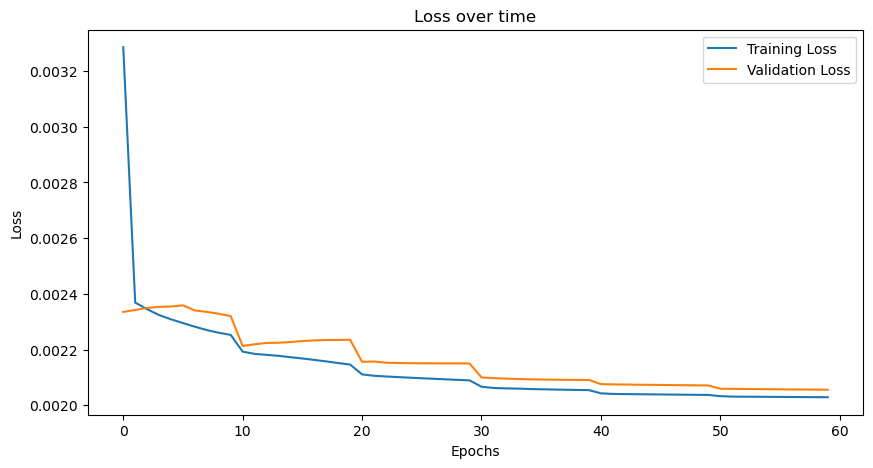

Root Mean Squared Error on Test Data: 7.5661664
Mean Bias Error on Test Data: -0.91586375
Mean Absolute Error on Test Data: 3.979774
Kling-Gupta efficiency on Test Data: 0.9306221275008474
R2 Score on Test Data: 0.9592272259442448


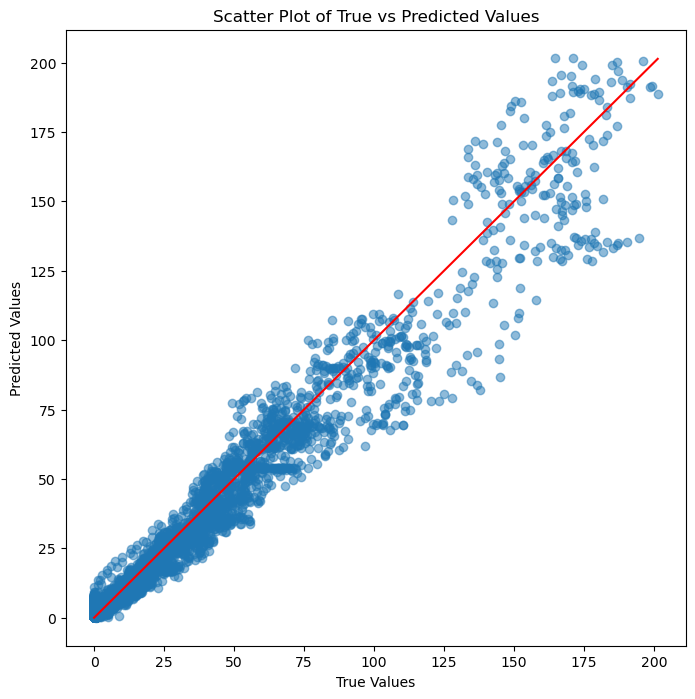

Epoch 1/60, Train Loss: 0.0034536419070463143, Val Loss: 0.0025158069083011272
Epoch 2/60, Train Loss: 0.002426722966514972, Val Loss: 0.0022287957320533914
Epoch 3/60, Train Loss: 0.0023714675483992413, Val Loss: 0.0021562448467955064
Epoch 4/60, Train Loss: 0.0023413719835286492, Val Loss: 0.002121153287312604
Epoch 5/60, Train Loss: 0.002315837565178879, Val Loss: 0.0021222868078632157
Epoch 6/60, Train Loss: 0.002291858352825571, Val Loss: 0.0021055223216212733
Epoch 7/60, Train Loss: 0.0022707125206789347, Val Loss: 0.0021224341995748157
Epoch 8/60, Train Loss: 0.0022566586208214103, Val Loss: 0.0021417974786949413
Epoch 9/60, Train Loss: 0.002244570528408005, Val Loss: 0.0021362231539640425
Epoch 10/60, Train Loss: 0.0022359037380564246, Val Loss: 0.002124999577748279
Epoch 11/60, Train Loss: 0.0021537617390599193, Val Loss: 0.001977971502208081
Epoch 12/60, Train Loss: 0.0021562902465669456, Val Loss: 0.0019687612173649367
Epoch 13/60, Train Loss: 0.0021536961669202243, Val Loss

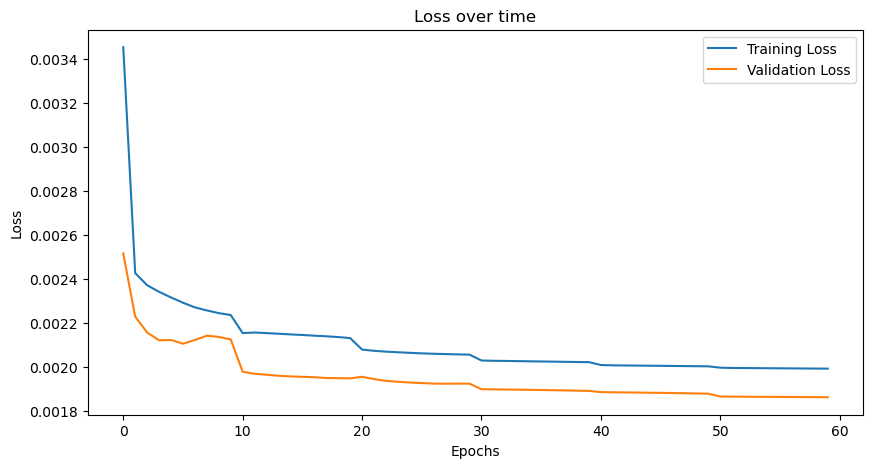

Root Mean Squared Error on Test Data: 6.125567
Mean Bias Error on Test Data: -0.96099895
Mean Absolute Error on Test Data: 3.5226176
Kling-Gupta efficiency on Test Data: 0.9480943147654107
R2 Score on Test Data: 0.9747117073541579


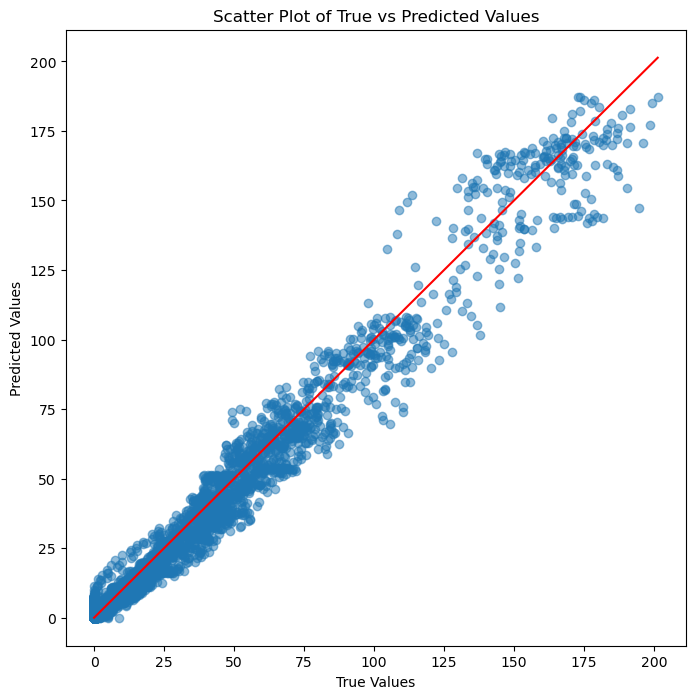

In [10]:
# Train the model with the architecture that will have the best performance
_, rmse_test_n, mae_test_n, mbe_test_n, kge_test_n, r2_test_n = tool.train(df=df, df_test=df_test, var=['HS'], hidden_dims=[60,30], 
                                num_epochs=60,  step_size=10, gamma=0.5, ts=14, lr=0.001, is_early_stop=True, threshold=10)
_, rmse_test_m, mae_test_m, mbe_test_m, kge_test_m, r2_test_m = tool.train(df=df, df_test=df_test, var=['HS'], hidden_dims=[60,30], 
                                num_epochs=60,  step_size=10, gamma=0.5, ts=30, lr=0.001, is_early_stop=True, threshold=10)

In [9]:
# For example, this is the results we get from repeating the model training processes
result_null = [6.836359, 8.114181, 6.90525] 
result_modif = [7.2975154, 6.04071377, 6.017790169] 

In [10]:
tool.t_test(result_null, result_modif)

T-statistic: -4.698623794600889
P-value: 0.04243360599222081
p-value is less than 0.05, hence the modification show significant improvement.


# Conclusion

Hence the time sequence with 30-day will be selected.

The final setup of the model is:

++++++++++++++++++++++++++++++++++

Architecture - [60,30]

Feature - 'HS' 

Time sequence - 30

++++++++++++++++++++++++++++++++++

# Save the model

In [8]:
model_name = "global_model_final"

In [10]:
torch.save(model.state_dict(), f"./models/{model_name}.pth")